In [2]:
# Dependencies
import datetime as dt
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


## D1: Determine the Summary Statistics for June

In [6]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()


[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [7]:
# 2. Convert the June temperatures to a list.
juneTemps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()

print(juneTemps)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [32]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(juneTemps, columns=['June temps'])
df

,June temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [33]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame
df.describe()
#junetemps

,June temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [10]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [19]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
decPrcp = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

junePrcp = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "06").all()



In [29]:
decPrcpdf = pd.DataFrame(decPrcp, columns=['December prcp'])
junePrcpdf = pd.DataFrame(junePrcp, columns=['June prcp'])

In [30]:
junePrcpdf.describe()

,June prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [31]:
decPrcpdf.describe()

,December prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [14]:
# 7. Convert the December temperatures to a list.
decTemps = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

print(decTemps)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [26]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
decdf = pd.DataFrame(decTemps, columns=['December Temps'])
decdf

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [27]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
decdf.describe()
#decTemps

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

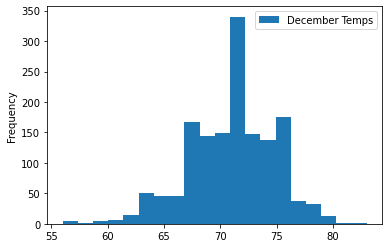

In [34]:
decdf.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

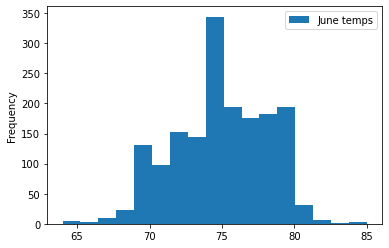

In [40]:
df.plot.hist(bins=17)

<AxesSubplot:ylabel='Frequency'>

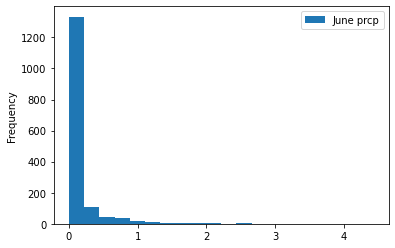

In [35]:
junePrcpdf.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

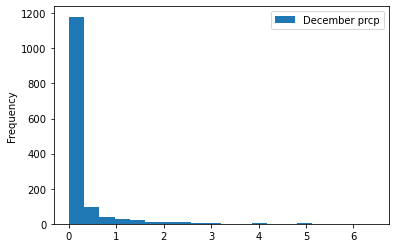

In [36]:
decPrcpdf.plot.hist(bins=20)